In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)

# Load the datasets

In [2]:
df_raw_beer = pd.read_csv('../data/raw/beer_reviews.csv')

In [3]:
df_raw_beer.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


# 1. Structure investigation

#### *The raw train datasets have 1586614 rows and 13 columns.  

In [4]:
df_raw_beer.shape

(1586614, 13)

In [5]:
df_raw_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


# 2. Quality investigation

## 2.1 Duplicates

In [6]:
# Check number of duplicates
duplicates_count = df_raw_beer.duplicated().sum()
print(f"You have {duplicates_count} duplicates in the main data.")

You have 0 duplicates in the main data.


In [7]:
# Check number of duplicates while ignoring the index feature
duplicates_count = df_raw_beer.drop(labels=["brewery_id"], axis=1).duplicated().sum()
print(f"You have {duplicates_count} duplicates in the main data - ignoring the brewery_id.")

You have 0 duplicates in the main data - ignoring the brewery_id.


## 2.2 Missing values

In [8]:
df_raw_beer.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [9]:
# df_raw_beer.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
#           figsize=(15, 30), markersize=1);

# 3. Content investigation

In [10]:
# df_numeric    = df_raw_beer.drop(['brewery_id', 'brewery_name', 'review_time', 'review_profilename', ], axis=1, inplace=True)

df_numeric = df_raw_beer[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']] 

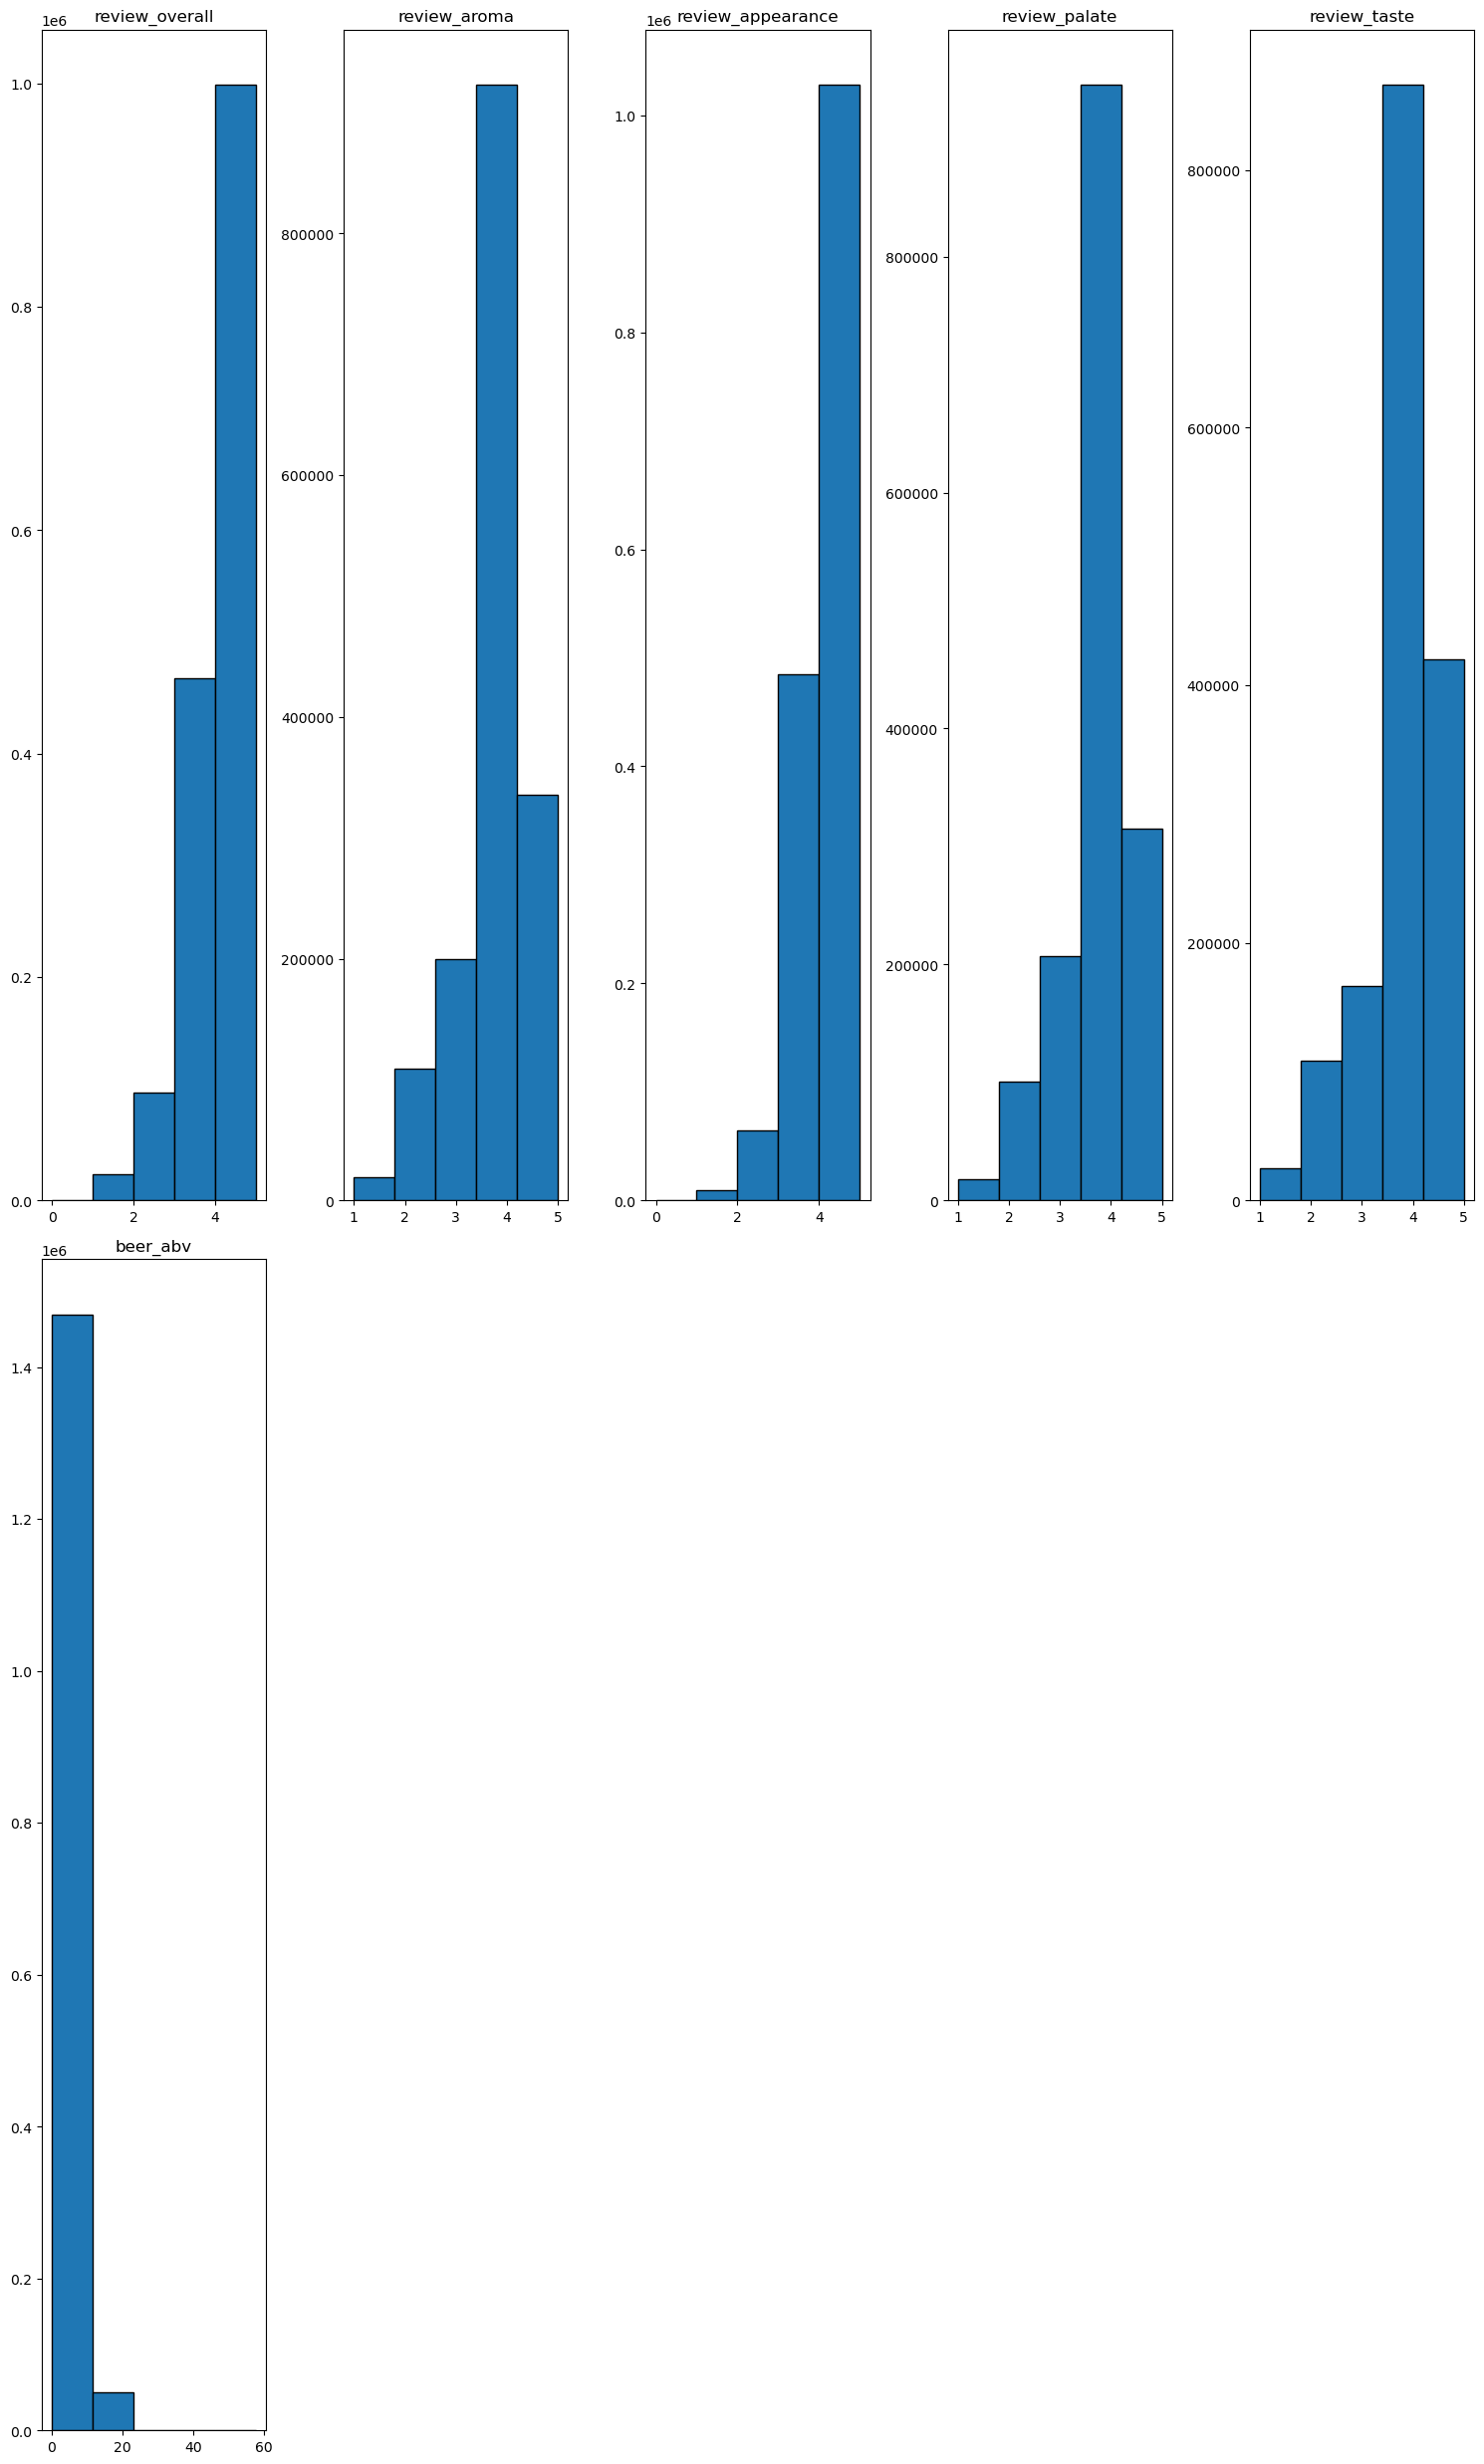

In [11]:
# using matplotlib.pyplot - plt

# Plots the histogram for each numerical feature in a separate subplot
# df_numeric.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black", grid=False)
df_numeric.hist(bins=5, figsize=(15, 25), layout=(-1, 5), edgecolor="black", grid=False)
plt.tight_layout();

# 4. Data Exploration

In [12]:
df_raw_beer.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [13]:
df_temp = df_raw_beer.copy()
df_temp.drop(['brewery_id',
                 'review_profilename', 
                 'review_time',
                 'beer_name',
                 'beer_beerid',
                 'review_overall',
                  'brewery_name', 
                  'beer_style'
                ], axis=1, inplace=True)
df_temp.head()

,review_aroma,review_appearance,review_palate,review_taste,beer_abv
0,2.0,2.5,1.5,1.5,5.0
1,2.5,3.0,3.0,3.0,6.2
2,2.5,3.0,3.0,3.0,6.5
3,3.0,3.5,2.5,3.0,5.0
4,4.5,4.0,4.0,4.5,7.7


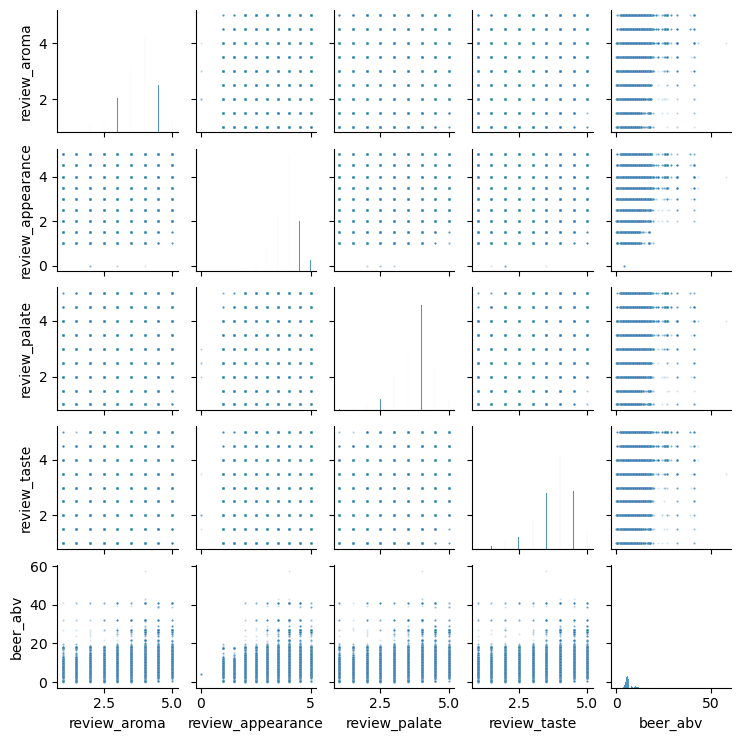

In [14]:
sns.pairplot(df_temp, 
             height=1.5,
             plot_kws={"s":2, "alpha":0.2}
            );

In [15]:
# df_raw_beer['beer_style'].value_counts()

In [17]:
print(df_temp.corr())

                   review_aroma  review_appearance  review_palate  \
review_aroma           1.000000           0.561029       0.616947   
review_appearance      0.561029           1.000000       0.566634   
review_palate          0.616947           0.566634       1.000000   
review_taste           0.716776           0.546980       0.734135   
beer_abv               0.332570           0.263941       0.286711   

                   review_taste  beer_abv  
review_aroma           0.716776  0.332570  
review_appearance      0.546980  0.263941  
review_palate          0.734135  0.286711  
review_taste           1.000000  0.290827  
beer_abv               0.290827  1.000000  


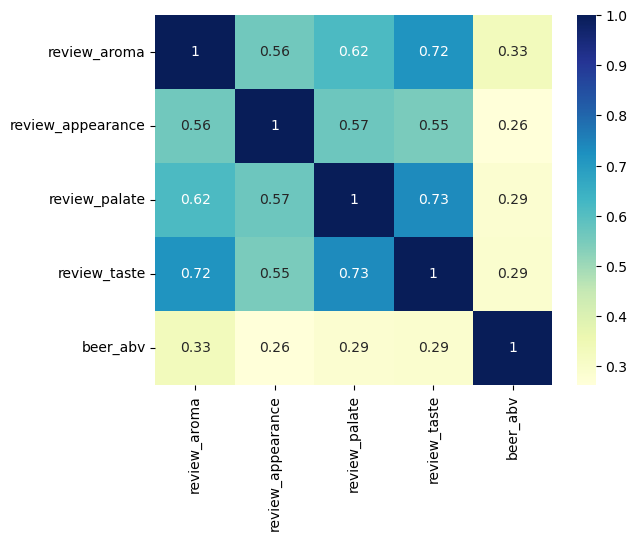

In [21]:
# plotting correlation heatmap
dataplot = sns.heatmap(df_temp.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [16]:
datax = df_raw_beer['beer_style'].value_counts()
datay = pd.DataFrame({
  'beer_style': datax.index, 
  'Frequency': datax.values,
  'Percent': ((datax.values/datax.values.sum())*100).round(2),
  'Cumulative Frequenc': datax.values.cumsum(),
  'Cumulative Percen':((datax.values.cumsum()/datax.values.sum())*100).round(2)
})

datay

,beer_style,Frequency,Percent,Cumulative Frequenc,Cumulative Percen
0,American IPA,117586,7.41,117586,7.41
1,American Double / Imperial IPA,85977,5.42,203563,12.83
2,American Pale Ale (APA),63469,4.00,267032,16.83
3,Russian Imperial Stout,54129,3.41,321161,20.24
4,American Double / Imperial Stout,50705,3.20,371866,23.44
5,American Porter,50477,3.18,422343,26.62
6,American Amber / Red Ale,45751,2.88,468094,29.50
7,Belgian Strong Dark Ale,37743,2.38,505837,31.88
8,Fruit / Vegetable Beer,33861,2.13,539698,34.02
9,American Strong Ale,31945,2.01,571643,36.03
